In [2]:
# Insert the library which we may need

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wa-fnusec-telcocustomerchurncsv/WA_Fn-UseC_-Telco-Customer-Churn.csv
/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [3]:
!ls ../input/telco-customer-churn

WA_Fn-UseC_-Telco-Customer-Churn.csv


#### input the dataset and have a general view to dataset ####

In [4]:
# path = C:\Users\M1820\Desktop\Telco_customer_churn
Customer = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
Customer.info()
print("================================")
Customer.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### now we have a general view to the dataset, let's clean the data:
1. check is there any null value
2. check is there any depulicate value
3. check is there any null value expressed in different way, such as "-" or " "
4. if there is any miss value, fill them
5. check is there outlier detection, mean +/- 3 * standard deviation


##### Check is there any null value #####

In [5]:
pd.isnull(Customer).any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

##### Delet duplicate rows #####

In [6]:
Customer.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### Convert the data type. ###
There are 7043 rows which equals to the original rows, that means there is not any duplicate rows in the dataset.
But "SeniorCitizen" should be a category, "MonthlyCharges", "TotalCharges" should be numerical type.

In [7]:
Customer.SeniorCitizen.astype('object')

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: object

Then check is there any null value expressed in different way, first check type "object", which is used to describe the categary, as there can be just few different values.

In [8]:
obj_column = Customer.select_dtypes('object').columns
for obj in obj_column:
    print(f'{obj}:{Customer[obj].unique()}')
    

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


Obviously, there isn't null value described with other values.

To check continuous value, it is hard to check one by one by find the unique value for each column. But if some value missed, it will not be able to convert them to float.

In [9]:
Customer.MonthlyCharges.astype('float64')
# Customer.TotalCharges.astype('float64')
# according to the error report,there must be some values are not numerical value  

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

So find out all of the meaningless value and the index

In [10]:
i = 0
sum = 0
nullvalue = []
for row in Customer.iterrows():
    item = row[1]
    totalcharge = item['TotalCharges']
    try:
        totalcharge = float(totalcharge)
        sum = sum + totalcharge
    except:
        i = i + 1
#         item['TotalCharges'] = None
        print(row[0], "totalcharge is '", totalcharge, "'")
        nullvalue.append(row[0])
    
M = round(sum/(Customer.size - i), 2)
print(M)
print(nullvalue)

488 totalcharge is '   '
753 totalcharge is '   '
936 totalcharge is '   '
1082 totalcharge is '   '
1340 totalcharge is '   '
3331 totalcharge is '   '
3826 totalcharge is '   '
4380 totalcharge is '   '
5218 totalcharge is '   '
6670 totalcharge is '   '
6754 totalcharge is '   '
108.57
[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]


##### fill the missing value #####
As there are 11 missing value expressed by ' ', for the whole dataset(7042), it is insignificant in the whole dataset. 
Therefore, here fill the missing value with the mean.

In [11]:
for row in Customer.iterrows():
    if row[0] in nullvalue:
        item['TotalCharges'] = M
        
# Customer['TotalCharges'].astype('float64')

print(type(Customer))
# Customer["TotalCharges"] = Customer.TotalCharges.replace('   ',np.nan).astype(float)
Customer["TotalCharges"] = pd.to_numeric(Customer["TotalCharges"], downcast="float", errors='coerce')
print(Customer["TotalCharges"])
# Customer.TotalCharges.astype(float).fillna(M)
# Customer = Customer.astype({'TotalCharges':'float'})

<class 'pandas.core.frame.DataFrame'>
0         29.850000
1       1889.500000
2        108.150002
3       1840.750000
4        151.649994
           ...     
7038    1990.500000
7039    7362.899902
7040     346.450012
7041     306.600006
7042    6844.500000
Name: TotalCharges, Length: 7043, dtype: float32


In [12]:
Customer[Customer['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


##### check outlier data, mean +/- 3 * standard deviation 

In [13]:
# First to check the general info of "MonthlyCharges" and "TotalCharges"
charges = ['MonthlyCharges', 'TotalCharges']
Customer[charges].describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7032.000000
mean,64.761692,2283.300537
std,30.090047,2266.771484
min,18.250000,18.799999
25%,35.500000,401.450012
50%,70.350000,1397.475098
75%,89.850000,3794.737549
max,118.750000,8684.799805


In [14]:
MC_mean = Customer['MonthlyCharges'].mean()
MC_std = Customer['MonthlyCharges'].std()
MC_max = MC_mean + 3 * MC_std
MC_min = MC_mean - 3 * MC_std
TC_mean = Customer['TotalCharges'].mean()
TC_std = Customer['TotalCharges'].std()
TC_max = TC_mean + 3 * TC_std
TC_min = TC_mean - 3 * TC_std
print("MonthlyCharges should between ", MC_min, ' to ', MC_max)
print("TotalCharges should between ", TC_min, ' to ', TC_max)

MonthlyCharges should between  -25.5084488324363  to  155.03183375363466
TotalCharges should between  -4517.013916015625  to  9083.614990234375


By comparing the mean+/- 3* standard deviation, it seems that there isn't any outlier data.

##### Analyze the churn of customers #####
first to check the percentage of churn

there are  0.2653698707936959  customers churned


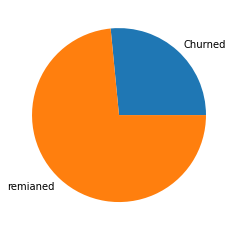

In [15]:
churn_Yes = Customer['Churn'][Customer['Churn'] =='Yes'].count()
churn_No = Customer['Churn'][Customer['Churn'] =='No'].count()
churnperct = churn_Yes / Customer['Churn'].count()
print("there are ", churnperct, ' customers churned')
churn_pie = np.array([churn_Yes, churn_No])
labels = ["Churned","remianed"]
plt.pie(churn_pie, labels = labels)
plt.show()

deal with the data, and caculate the Correlation coefficient

In [16]:
Customer['Churn'].replace(to_replace='Yes',value = 1, inplace = False)
Customer['Churn'].replace(to_replace='No',value = 0)
print(Customer["Churn"])

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object


Analyze variable correlation

In [17]:
Customer.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


There are only four columns here, as the rest columns are categories rather than numerical data. ".get_dummies()" will help to convert categories data to numerical data.

In [18]:
# NoID_Cus = Customer.iloc[:,1:].copy()
NoID_Cus = Customer.drop('customerID', axis=1)

NoID_Cus['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
NoID_Cus['Churn'].replace(to_replace = 'No', value = 0, inplace = True)
num_cust = pd.get_dummies(NoID_Cus)

In [19]:
num_cust.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.150889,0.001874,-0.001874,-0.016479,0.016479,0.211185,...,0.120176,0.138360,-0.046262,-0.117000,-0.156530,0.156530,-0.016159,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.825880,-0.352229,-0.005106,0.005106,-0.379697,0.379697,-0.159712,...,0.286111,-0.645561,0.202570,0.558533,-0.006152,0.006152,0.243510,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,0.193356,0.014569,-0.014569,-0.096848,0.096848,0.113890,...,0.627429,0.060165,0.004904,-0.074681,-0.352150,0.352150,0.042812,0.030550,0.271625,-0.377437
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,0.150889,-0.352229,0.193356,-0.199484,1.000000,0.008612,-0.008612,0.150448,-0.150448,0.164221,...,0.061382,0.405103,-0.177820,-0.302253,-0.191825,0.191825,-0.117937,-0.134302,0.301919,-0.091683
gender_Female,0.001874,-0.005106,0.014569,-0.000048,0.008612,1.000000,-1.000000,-0.001808,0.001808,0.010517,...,0.010487,0.003386,-0.008026,0.003695,-0.011754,0.011754,0.016024,-0.001215,-0.000752,-0.013744
gender_Male,-0.001874,0.005106,-0.014569,0.000048,-0.008612,-1.000000,1.000000,0.001808,-0.001808,-0.010517,...,-0.010487,-0.003386,0.008026,-0.003695,0.011754,-0.011754,-0.016024,0.001215,0.000752,0.013744
Partner_No,-0.016479,-0.379697,-0.096848,-0.319072,0.150448,-0.001808,0.001808,1.000000,-1.000000,0.452676,...,-0.117412,0.280865,-0.082783,-0.248091,-0.014877,0.014877,-0.110706,-0.082029,0.083852,0.095125
Partner_Yes,0.016479,0.379697,0.096848,0.319072,-0.150448,0.001808,-0.001808,-1.000000,1.000000,-0.452676,...,0.117412,-0.280865,0.082783,0.248091,0.014877,-0.014877,0.110706,0.082029,-0.083852,-0.095125
Dependents_No,0.211185,-0.159712,0.113890,-0.064653,0.164221,0.010517,-0.010517,0.452676,-0.452676,1.000000,...,0.039741,0.231720,-0.068368,-0.204613,-0.111377,0.111377,-0.052021,-0.060267,0.150642,-0.059071


<class 'pandas.core.series.Series'>


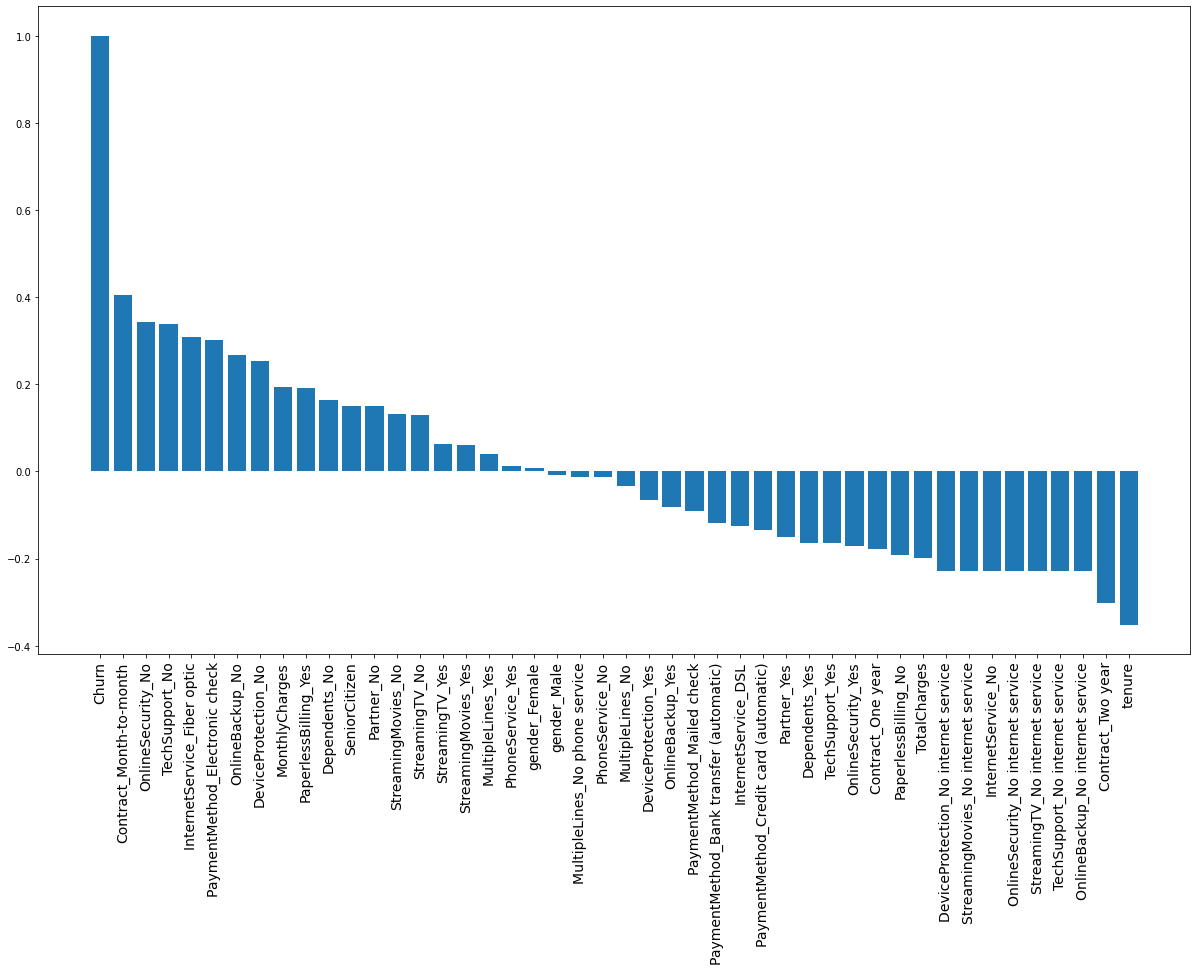

In [20]:
series_num_cast = num_cust.corr()["Churn"].sort_values(ascending = False)
print(type(num_cust.corr()["Churn"].sort_values(ascending = False)))
# print(series_num_cast.index)
fig = plt.figure(figsize=(16, 9))
ax = fig.add_axes([1,1,1,1])
catagory = series_num_cast.index
corr = series_num_cast.array
ax.bar(catagory,corr)
plt.xticks(fontsize=14, rotation = 90)

plt.show()

Thus obviously, "Contract Month to Month", "techSupport", "Tenure", "Contract time" more significant effect on user churn.

The tags can be divided into 3 categories, user personal information (age, single, economic status, etc.), user account information (network access time, annual or monthly fees, payment methods, etc.) and service information (whether to open various services, etc.). Then analyze from these 3 dimention.

In [21]:
#  define a function to visulize the percentage of churned customers with different tags
def getTuple(column1, condition1, condition2):
    Churn_Y = ()
    Churn_N = ()
    condition1Y_ChurnY = 0
    condition1Y_ChurnN = 0
    condition2Y_ChurnY = 0
    condition2Y_ChurnN = 0
    condition3Y_ChurnY = 0
    condition3N_ChurnN = 0

    for i in range(1, 7042):
        if Customer.iloc[i][column1] == condition1:
            if Customer.iloc[i]['Churn'] == 'Yes':
                condition1Y_ChurnY = condition1Y_ChurnY + 1
            else:
                condition1Y_ChurnN = condition1Y_ChurnN + 1
        elif Customer.iloc[i][column1] == condition2: 
            if Customer.iloc[i]['Churn'] == 'Yes':
                condition2Y_ChurnY = condition2Y_ChurnY + 1
            else:
                condition2Y_ChurnN = condition2Y_ChurnN + 1
        elif Customer.iloc[i]['Churn'] == 'Yes':
            condition3Y_ChurnY = condition3Y_ChurnY + 1
        else:
            condition3N_ChurnN = condition3N_ChurnN + 1
    if condition3Y_ChurnY == 0:
        Churn_Y = Churn_Y + (condition1Y_ChurnY, condition2Y_ChurnY)
        Churn_N = Churn_N + (condition1Y_ChurnN, condition2Y_ChurnN)
    else:
        Churn_Y = Churn_Y + (condition1Y_ChurnY, condition2Y_ChurnY, condition3Y_ChurnY)
        Churn_N = Churn_N + (condition1Y_ChurnN, condition2Y_ChurnN, condition3N_ChurnN)
    return Churn_N, Churn_Y


In [22]:
def barChart(tupleA, tupleB, Xlabel, xtick_tup):
    n_groups = len(tupleA)

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, tupleA, bar_width,alpha=opacity, label="No Churn")
    rects2 = plt.bar(index + bar_width, tupleB, bar_width,alpha=opacity, label="Yes Churn")

    plt.xlabel(Xlabel)
    plt.ylabel('Churn')
    plt.title('Churn by '+ Xlabel)
    plt.xticks(index + 0.5 * bar_width, xtick_tup)
    plt.legend()

    plt.tight_layout()
    plt.show()

- First to analyze by personal information

(2548, 2624) (939, 930)


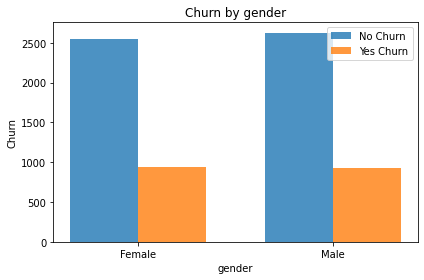

In [23]:
Churng_N, Churng_Y = getTuple('gender','Female', 'Male' )
print(Churng_N, Churng_Y)
barChart(Churng_N, Churng_Y, 'gender', ('Female', 'Male'))

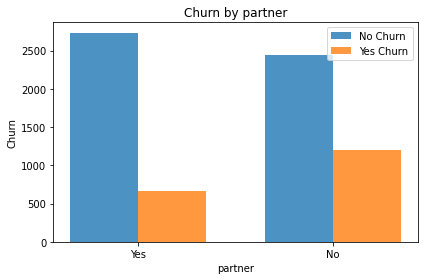

In [24]:
ChurnP_N, ChurnP_Y = getTuple('Partner', 'Yes', 'No')
barChart(ChurnP_N, ChurnP_Y, 'partner', ('Yes', 'No'))

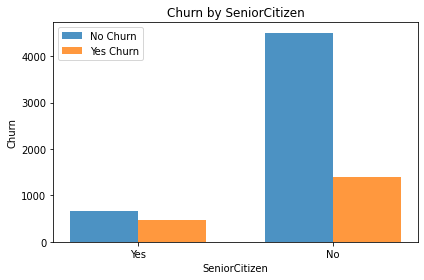

In [25]:
Senior_N, Senior_Y = getTuple('SeniorCitizen', 1, 0)
barChart(Senior_N, Senior_Y, 'SeniorCitizen', ('Yes', 'No'))

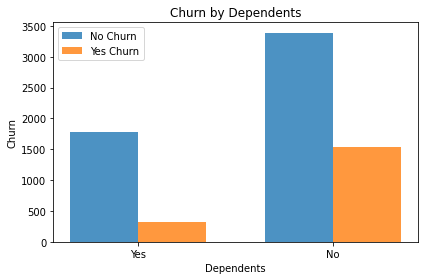

In [26]:
Dep_N, Dep_Y = getTuple('Dependents', "Yes", 'No')
barChart(Dep_N, Dep_Y, 'Dependents', ('Yes', 'No'))

- Then to analyze by service infomation

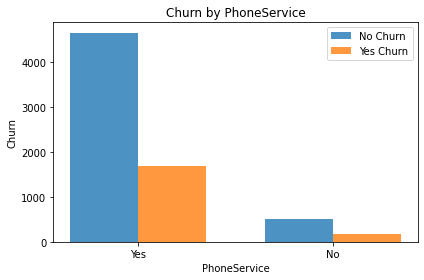

In [27]:
Phone_N, Phone_Y = getTuple('PhoneService', "Yes", 'No')
barChart(Phone_N, Phone_Y, 'PhoneService', ('Yes', 'No'))

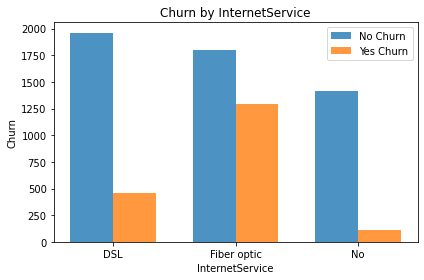

In [28]:
internet_N, internet_Y = getTuple('InternetService', 'DSL', 'Fiber optic')
barChart(internet_N, internet_Y, 'InternetService', ('DSL', 'Fiber optic', 'No'))

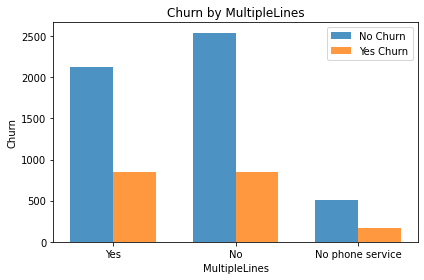

In [29]:
MultiLine_N, MultiLine_Y = getTuple('MultipleLines', "Yes", 'No')
barChart(MultiLine_N, MultiLine_Y, 'MultipleLines', ('Yes', 'No', 'No phone service'))

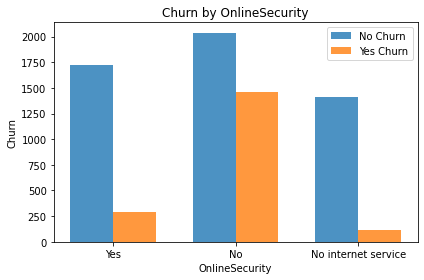

In [30]:
Security_N, Security_Y = getTuple('OnlineSecurity', "Yes", 'No')
barChart(Security_N, Security_Y, 'OnlineSecurity', ('Yes', 'No', 'No internet service'))

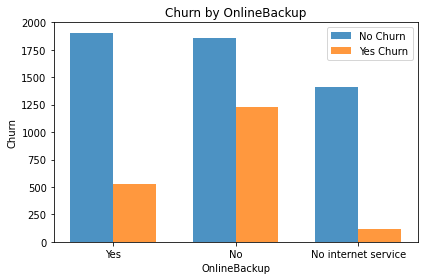

In [31]:
backup_N, backup_Y = getTuple('OnlineBackup', "Yes", 'No')
barChart(backup_N, backup_Y, 'OnlineBackup', ('Yes', 'No', 'No internet service'))

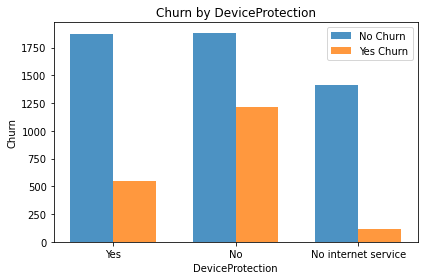

In [32]:
protection_N, protection_Y = getTuple('DeviceProtection', "Yes", 'No')
barChart(protection_N, protection_Y, 'DeviceProtection', ('Yes', 'No', 'No internet service'))

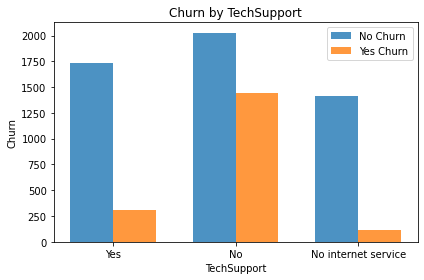

In [33]:
support_N, support_Y = getTuple('TechSupport', "Yes", 'No')
barChart(support_N, support_Y, 'TechSupport', ('Yes', 'No', 'No internet service'))

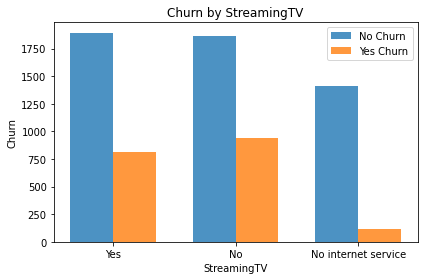

In [34]:
TV_N, TV_Y = getTuple('StreamingTV', "Yes", 'No')
barChart(TV_N, TV_Y, 'StreamingTV', ('Yes', 'No', 'No internet service'))

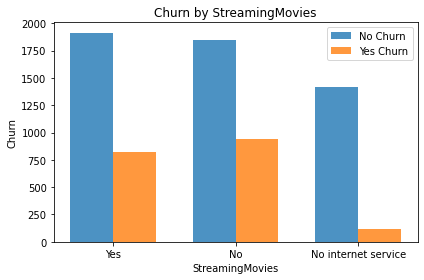

In [35]:
Movie_N, Movie_Y = getTuple('StreamingMovies', "Yes", 'No')
barChart(Movie_N, Movie_Y, 'StreamingMovies', ('Yes', 'No', 'No internet service'))

- Last analyze by account information

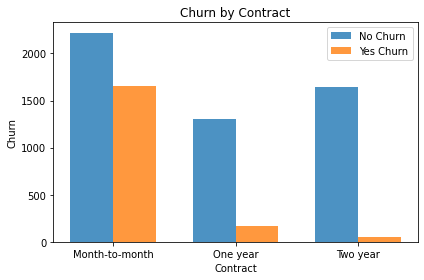

In [36]:
Contract_N, Contract_Y = getTuple('Contract', "Month-to-month", 'One year')
barChart(Contract_N, Contract_Y, 'Contract', ('Month-to-month','One year','Two year'))

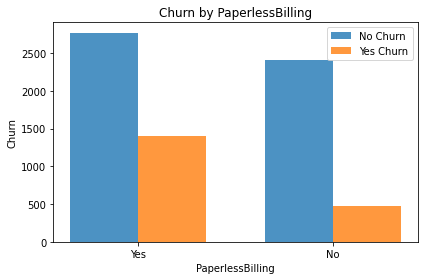

In [37]:
Billing_N, Billing_Y = getTuple('PaperlessBilling', 'Yes', 'No')
barChart(Billing_N, Billing_Y, 'PaperlessBilling', ('Yes', 'No'))

(1148, 730, 3294) (1037, 294, 538)


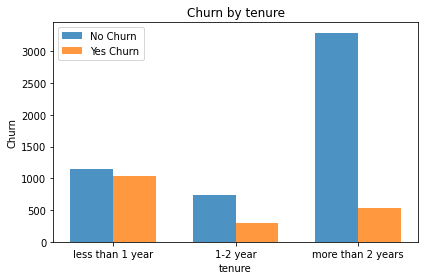

In [45]:
tenure_Y = ()
tenure_N = ()
condition1Y_ChurnY = 0
condition1Y_ChurnN = 0
condition2Y_ChurnY = 0
condition2Y_ChurnN = 0
condition3Y_ChurnY = 0
condition3N_ChurnN = 0

for i in range(1, 7042):
    if Customer.iloc[i]['tenure'] <= 12:
        if Customer.iloc[i]['Churn'] == 'Yes':
            condition1Y_ChurnY = condition1Y_ChurnY + 1
        else:
            condition1Y_ChurnN = condition1Y_ChurnN + 1
    elif Customer.iloc[i]['tenure'] <= 24: 
        if Customer.iloc[i]['Churn'] == 'Yes':
            condition2Y_ChurnY = condition2Y_ChurnY + 1
        else:
            condition2Y_ChurnN = condition2Y_ChurnN + 1
    elif Customer.iloc[i]['Churn'] == 'Yes':
        condition3Y_ChurnY = condition3Y_ChurnY + 1
    else:
        condition3N_ChurnN = condition3N_ChurnN + 1

tenure_Y = tenure_Y + (condition1Y_ChurnY, condition2Y_ChurnY, condition3Y_ChurnY)
tenure_N = tenure_N + (condition1Y_ChurnN, condition2Y_ChurnN, condition3N_ChurnN)
print(tenure_N, tenure_Y)
barChart(tenure_N, tenure_Y, 'tenure', ('less than 1 year', '1-2 year', 'more than 2 years'))

So for new customers there are more customers churned. 